In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [117]:
data = pd.read_csv('C:/Users/mdhla/OneDrive/Documents/Postgraduate/MSc/Semester 1/SFDS/week 6/DAE_project/lawyers')

### Data Preprocessing

In [118]:
data.head()

,ID,AGE,CTM,CLM,LVL,SDY
0,1,54,11,10,Senior Partner,35
1,2,25,1,0,Associate,10
2,3,30,9,8,Associate,87
3,4,26,3,3,Associate,8
4,5,28,3,5,Associate,4


In [119]:
data_encoded = pd.get_dummies(data, columns=['LVL'], dtype=int)
data_encoded.head()

,ID,AGE,CTM,CLM,SDY,LVL_Associate,LVL_Junior Partner,LVL_Managing Partner,LVL_Senior Associate,LVL_Senior Partner
0,1,54,11,10,35,0,0,0,0,1
1,2,25,1,0,10,1,0,0,0,0
2,3,30,9,8,87,1,0,0,0,0
3,4,26,3,3,8,1,0,0,0,0
4,5,28,3,5,4,1,0,0,0,0


In [122]:
normalizer = MinMaxScaler().set_output(transform='pandas')
normalized_data = normalizer.fit_transform(data_encoded)

In [123]:
normalized_data

,ID,AGE,CTM,CLM,SDY,LVL_Associate,LVL_Junior Partner,LVL_Managing Partner,LVL_Senior Associate,LVL_Senior Partner
0,0.000000,0.58,0.40,0.40,0.192308,0.0,0.0,0.0,0.0,1.0
1,0.005025,0.00,0.00,0.00,0.054945,1.0,0.0,0.0,0.0,0.0
2,0.010050,0.10,0.32,0.32,0.478022,1.0,0.0,0.0,0.0,0.0
3,0.015075,0.02,0.08,0.12,0.043956,1.0,0.0,0.0,0.0,0.0
4,0.020101,0.06,0.08,0.20,0.021978,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
195,0.979899,0.22,0.20,0.20,0.027473,0.0,0.0,0.0,1.0,0.0
196,0.984925,0.36,0.20,0.24,0.021978,0.0,0.0,0.0,1.0,0.0
197,0.989950,0.82,0.28,0.36,0.060440,0.0,0.0,0.0,0.0,1.0
198,0.994975,0.92,0.36,0.36,0.098901,0.0,0.0,0.0,0.0,1.0


In [124]:
y = normalized_data['CTM']
X = normalized_data[[column for column in normalized_data.columns if column not in ['CTM', 'ID'] ]]

In [125]:
X.head()

,AGE,CLM,SDY,LVL_Associate,LVL_Junior Partner,LVL_Managing Partner,LVL_Senior Associate,LVL_Senior Partner
0,0.58,0.40,0.192308,0.0,0.0,0.0,0.0,1.0
1,0.00,0.00,0.054945,1.0,0.0,0.0,0.0,0.0
2,0.10,0.32,0.478022,1.0,0.0,0.0,0.0,0.0
3,0.02,0.12,0.043956,1.0,0.0,0.0,0.0,0.0
4,0.06,0.20,0.021978,1.0,0.0,0.0,0.0,0.0


In [126]:
y.head()

0    0.40
1    0.00
2    0.32
3    0.08
4    0.08
Name: CTM, dtype: float64

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42)

# Question 2

## Forward Selection

Iteration 1: Selected features: ['CLM'] R-squared: 0.7116


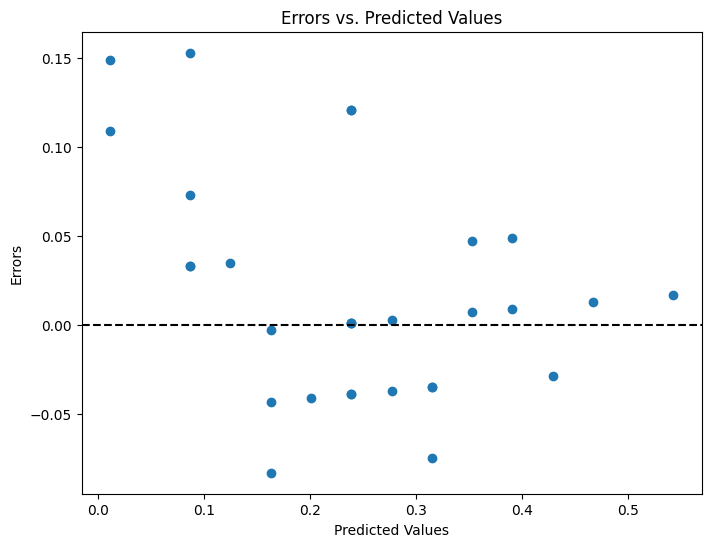

Iteration 2: Selected features: ['AGE', 'CLM'] R-squared: 0.7068


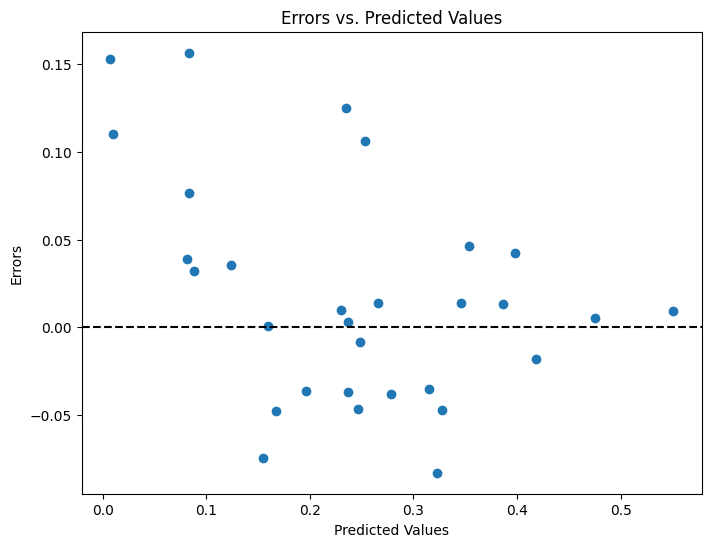

Iteration 3: Selected features: ['AGE', 'CLM', 'SDY'] R-squared: 0.7143


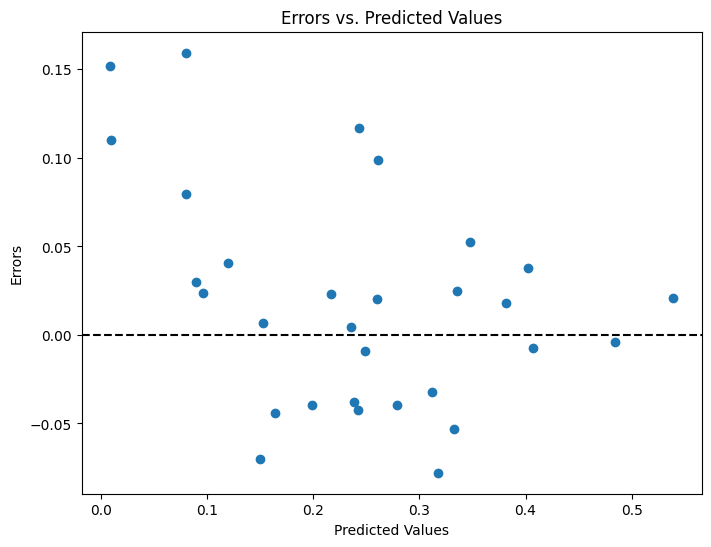

Iteration 4: Selected features: ['AGE', 'CLM', 'SDY', 'LVL_Senior Partner'] R-squared: 0.7083


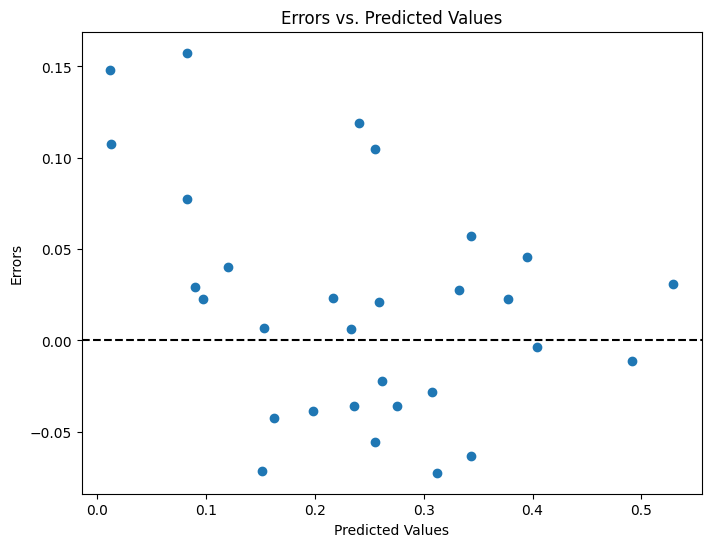

Iteration 5: Selected features: ['AGE', 'CLM', 'SDY', 'LVL_Senior Associate', 'LVL_Senior Partner'] R-squared: 0.7082


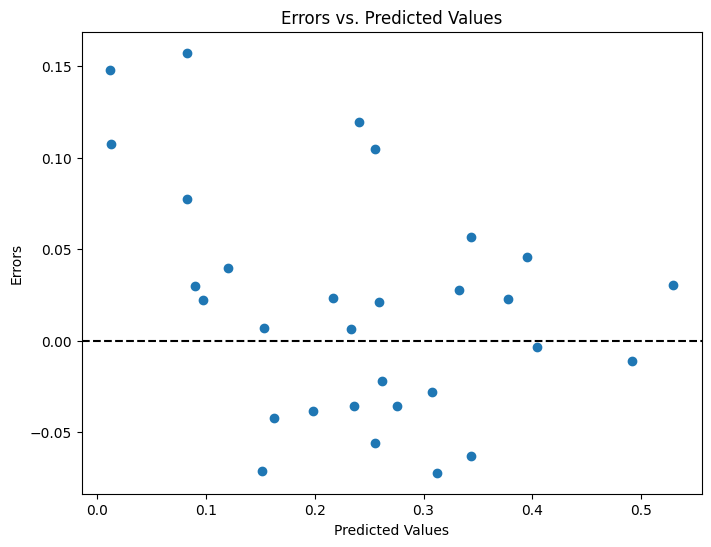

Iteration 6: Selected features: ['AGE', 'CLM', 'SDY', 'LVL_Managing Partner', 'LVL_Senior Associate', 'LVL_Senior Partner'] R-squared: 0.7193


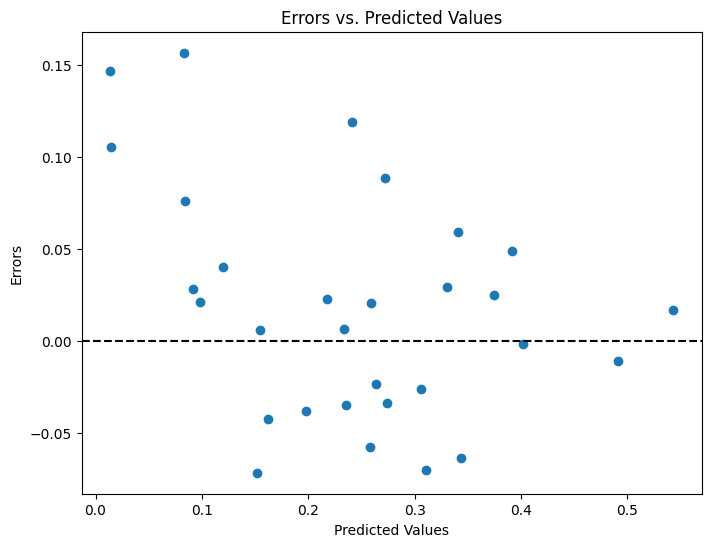

Iteration 7: Selected features: ['AGE', 'CLM', 'SDY', 'LVL_Junior Partner', 'LVL_Managing Partner', 'LVL_Senior Associate', 'LVL_Senior Partner'] R-squared: 0.7213


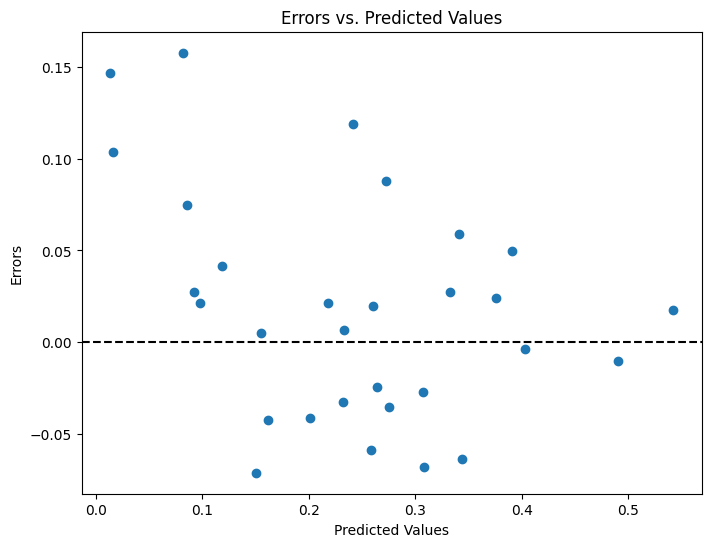

In [128]:
linear_model = LinearRegression()
selection_process = SequentialFeatureSelector(linear_model, direction='forward', scoring='r2')

for i in range(1, len(X_train.columns)):
    selection_process.n_features_to_select = i
    selection_process.fit(X_train, y_train)


    selected_features = list(X.columns[selection_process.get_support()])
    linear_model.fit(X_train[selected_features], y_train)
    y_pred = linear_model.predict(X_test[selected_features])
    r_squared = r2_score(y_test, y_pred)

    print(f'Iteration {i}: Selected features: {list(X.columns[selection_process.get_support()])} R-squared: {r_squared:.4f}')

    errors = y_test - y_pred

    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, errors)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title('Errors vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Errors')
    plt.show()


## Backward Selection

Iteration 1: Selected features: ['CLM', 'SDY', 'LVL_Associate', 'LVL_Junior Partner', 'LVL_Managing Partner', 'LVL_Senior Associate', 'LVL_Senior Partner'] R-squared: 0.7227


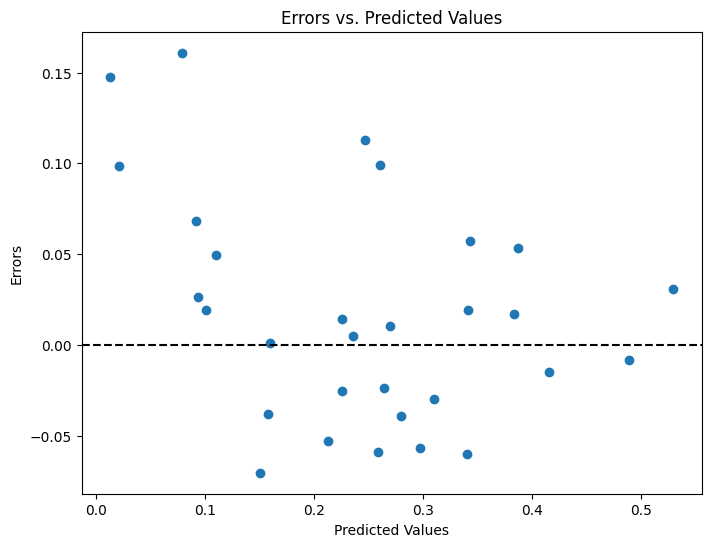

Iteration 2: Selected features: ['CLM', 'SDY', 'LVL_Associate', 'LVL_Junior Partner', 'LVL_Senior Associate', 'LVL_Senior Partner'] R-squared: 0.7301


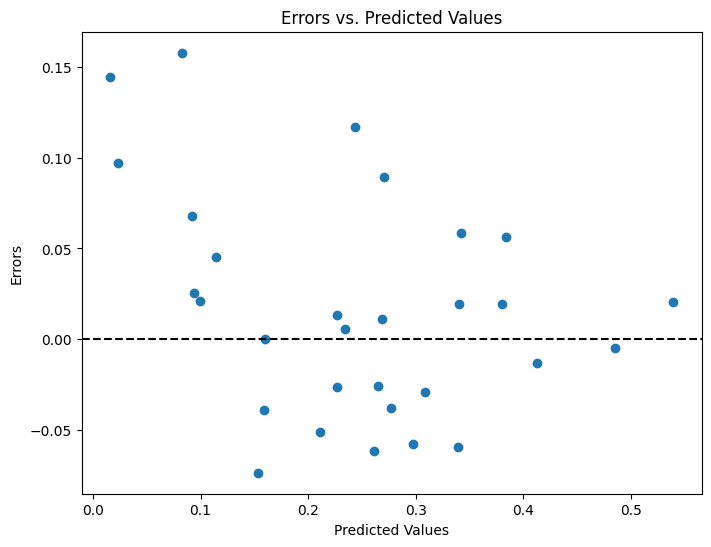

Iteration 3: Selected features: ['CLM', 'SDY', 'LVL_Associate', 'LVL_Senior Associate', 'LVL_Senior Partner'] R-squared: 0.7125


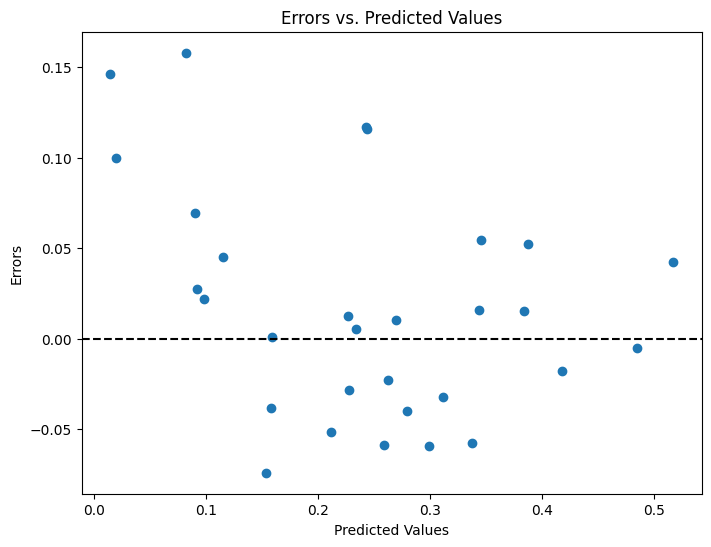

Iteration 4: Selected features: ['CLM', 'SDY', 'LVL_Senior Associate', 'LVL_Senior Partner'] R-squared: 0.7110


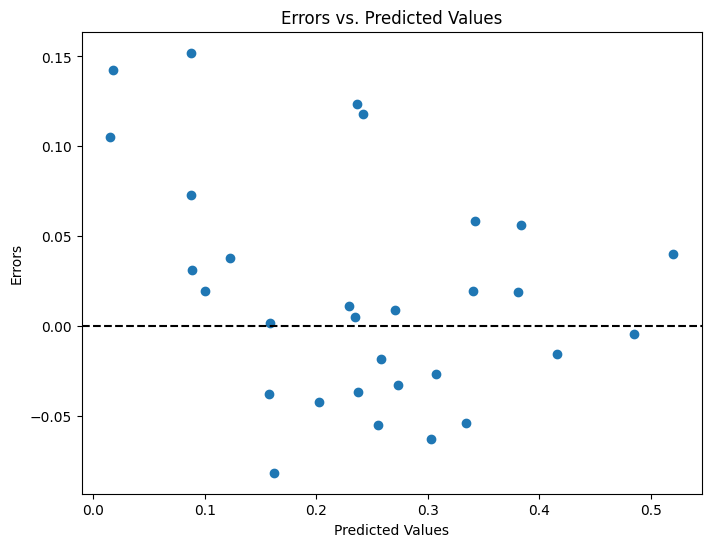

Iteration 5: Selected features: ['CLM', 'SDY', 'LVL_Senior Partner'] R-squared: 0.7111


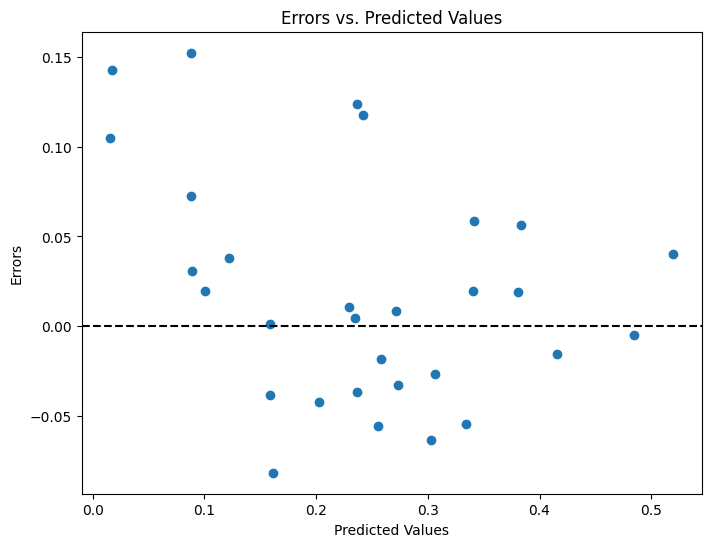

Iteration 6: Selected features: ['CLM', 'LVL_Senior Partner'] R-squared: 0.7040


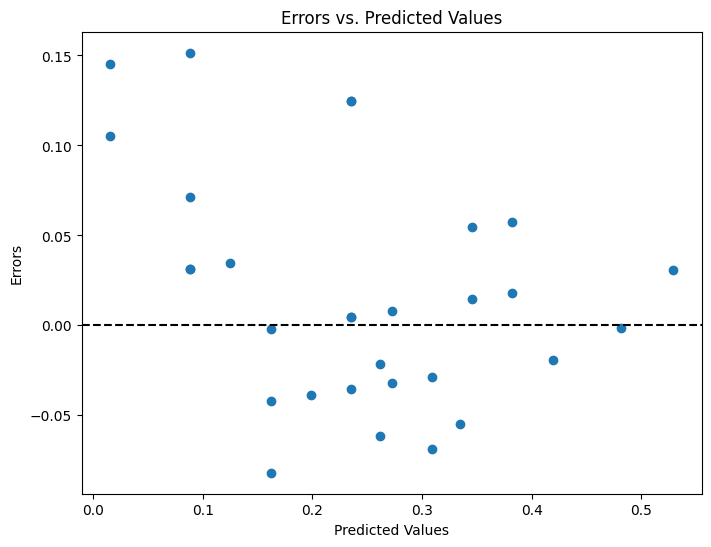

Iteration 7: Selected features: ['CLM'] R-squared: 0.7116


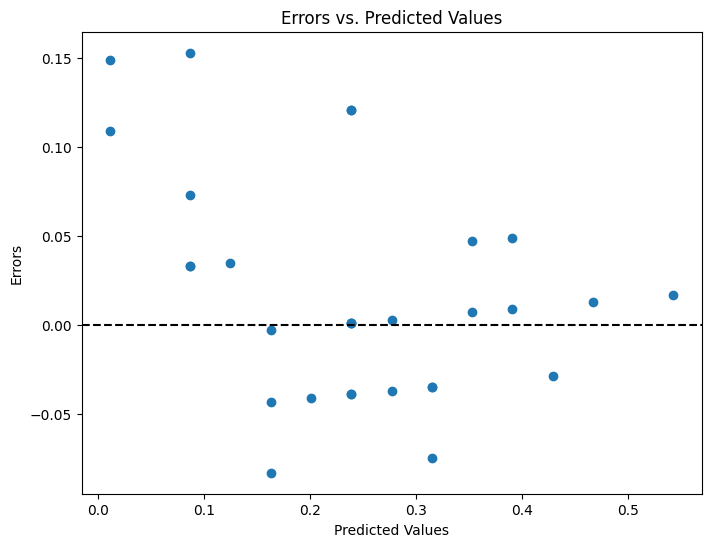

In [129]:
selection_process = SequentialFeatureSelector(linear_model, direction='backward', scoring='r2')

for i in range(len(X_train.columns)-1, 0, -1):
    selection_process.n_features_to_select = i
    selection_process.fit(X_train, y_train)

    selected_features = list(X_train.columns[selection_process.get_support()])
    linear_model.fit(X_train[selected_features], y_train)
    y_pred = linear_model.predict(X_test[selected_features])
    r_squared = r2_score(y_test, y_pred)

    print(f'Iteration {len(X_train.columns) - i}: Selected features: {selected_features} R-squared: {r_squared:.4f}')

    errors = y_test - y_pred

    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, errors)
    plt.axhline(y=0, color='k', linestyle='--')
    plt.title('Errors vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Errors')
    plt.show()
